# Analyse Weather Forecasts

In [1]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_dir = 'data'
plot_dir = 'plots'
if not os.path.exists(plot_dir):
    os.mkdir(plot_dir)

In [3]:
sorted([name for name in os.listdir(data_dir) if name.endswith('.csv')])

['temp_fcast_BC_0000141_2023-06-24.csv',
 'temp_fcast_BC_0000141_2023-06-25.csv',
 'temp_fcast_BC_0000141_2023-06-26.csv',
 'temp_fcast_BC_0000141_2023-06-27.csv',
 'temp_fcast_BC_0000141_2023-06-28.csv',
 'temp_fcast_BC_0000141_2023-06-29.csv',
 'temp_fcast_BC_0000141_2023-06-30.csv',
 'temp_fcast_BC_0000141_2023-07-01.csv',
 'temp_fcast_BC_0000141_2023-07-02.csv',
 'temp_fcast_BC_0000141_2023-07-03.csv',
 'temp_fcast_BC_0000141_2023-07-04.csv',
 'temp_fcast_BC_0000141_2023-07-05.csv',
 'temp_fcast_BC_0000141_2023-07-06.csv',
 'temp_fcast_BC_0000141_2023-07-07.csv',
 'temp_fcast_BC_0000141_2023-07-08.csv',
 'temp_fcast_BC_0000141_2023-07-09.csv',
 'temp_fcast_BC_0000141_2023-07-10.csv',
 'temp_fcast_BC_0000141_2023-07-11.csv',
 'temp_fcast_BC_0000141_2023-07-12.csv',
 'temp_fcast_BC_0000141_2023-07-13.csv',
 'temp_fcast_BC_0000141_2023-07-14.csv',
 'temp_fcast_BC_0000141_2023-07-15.csv',
 'temp_fcast_BC_0000141_2023-07-16.csv',
 'temp_fcast_BC_0000141_2023-07-17.csv',
 'temp_fcast_BC_

In [4]:
loc_key = 'temp_fcast_BC_0000317'
date_str = '2023-10-26'
filename = f'{loc_key}_{date_str}.csv'
filename

'temp_fcast_BC_0000317_2023-10-26.csv'

In [5]:
df = pd.read_csv(os.path.join(data_dir, filename))
df.index.name = 'Hour'
df.head()

,Date,Hour,Time,Current actual,Start hour,End hour,F00,F01,F02,F03,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23
Hour,,,,,,,,,,,,,,,,,,,,,
0,2023-10-26,0,00:05,3.2,1,0,3.0,2.0,2.0,1.0,...,8.0,8.0,8.0,7.0,6.0,5.0,4.0,4.0,3.0,2.0
1,2023-10-26,1,01:05,2.5,2,1,2.0,2.0,1.0,1.0,...,8.0,8.0,7.0,6.0,5.0,4.0,4.0,3.0,2.0,2.0
2,2023-10-26,2,02:05,2.4,3,2,2.0,1.0,1.0,1.0,...,8.0,7.0,6.0,5.0,4.0,4.0,3.0,2.0,2.0,1.0
3,2023-10-26,3,03:05,2.3,4,3,1.0,1.0,1.0,2.0,...,7.0,6.0,5.0,4.0,4.0,3.0,2.0,2.0,1.0,1.0
4,2023-10-26,4,04:05,2.1,5,4,1.0,1.0,2.0,2.0,...,6.0,5.0,4.0,4.0,3.0,2.0,2.0,1.0,1.0,0.0


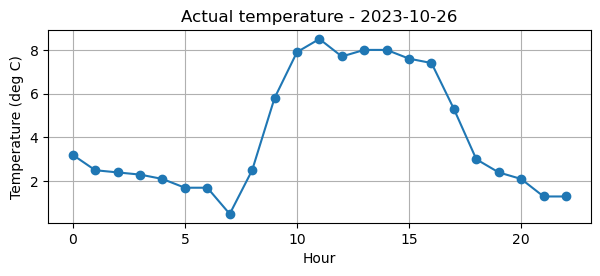

In [6]:
actual_temp = df['Current actual'].rename('Actual temperature')
actual_temp.plot(grid=True, style='o-', figsize=(7, 2.5))
plt.ylabel('Temperature (deg C)')
plt.title(actual_temp.name + f' - {date_str}')
plt.show()

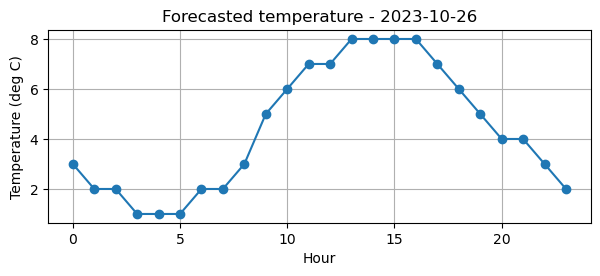

In [7]:
hours = np.arange(0, 24)
fcast_temp = df.loc[df.Hour == 0, [f'F{h:02d}' for h in hours]].loc[0].rename('Forecasted temperature')
fcast_temp.index = pd.Index(hours, name='Hour')
fcast_temp.plot(grid=True, style='o-', figsize=(7, 2.5))
plt.ylabel('Temperature (deg C)')
plt.title(fcast_temp.name + f' - {date_str}')
plt.show()

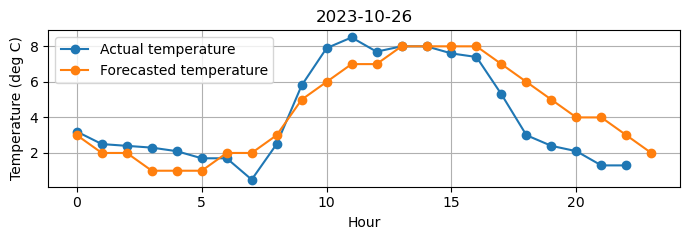

In [8]:
actual_temp.plot(grid=True, style='o-', figsize=(7, 2.5))
fcast_temp.plot(grid=True, style='o-', figsize=(7, 2.5))
plt.ylabel('Temperature (deg C)')
plt.title(date_str)
plt.legend()
plt.tight_layout()
filename = f"fcast_vs_actual_{date_str}.png"
plt.savefig(os.path.join(plot_dir, filename), dpi=150)
plt.show()

In [9]:
rms_error = np.sqrt(np.mean((actual_temp - fcast_temp) ** 2))
rms_error

1.420042865244016

## Calculate all forecasts and actuals

In [10]:
actual_temps = []
fcast_temps = []
index = pd.date_range('2023-06-26', '2023-10-28', name='Date')
for date in index:
    date_str = date.strftime('%Y-%m-%d')
    filename = f'{loc_key}_{date_str}.csv'
    df = pd.read_csv(os.path.join(data_dir, filename))
    fcast_temp = df.loc[df.Hour == 0, [f'F{h:02d}' for h in hours]]
    try:
        fcast_temp = fcast_temp.loc[0].rename('Forecasted temperature')
    except KeyError:
        fcast_temp = pd.Series(np.full((24, ), np.nan))
    fcast_temp.index = hours
    actual_temp = df['Current actual'].rename('Actual temperature')
    rms_error = np.sqrt(np.mean((actual_temp - fcast_temp) ** 2))
    #print(f"{date_str}: {rms_error:.2f}")
    actual_temps.append(actual_temp)
    fcast_temps.append(fcast_temp)
hours_index = pd.Index(hours, name='Hour')
fcast_temps = pd.DataFrame(fcast_temps, index=index, columns=hours_index)
actual_temps = pd.DataFrame(actual_temps, index=index, columns=hours_index)
actual_temps.shape

(125, 24)

In [11]:
actual_temps.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-26,15.5,15.0,13.3,13.4,12.3,12.4,12.9,15.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-27,17.3,15.6,14.8,14.3,13.3,12.8,12.9,14.0,15.5,17.8,...,19.4,20.4,20.6,20.0,19.8,19.6,20.1,19.4,17.3,16.0
2023-06-28,15.6,15.0,14.0,13.8,13.2,13.4,13.9,15.8,18.9,18.0,...,20.2,20.8,22.1,21.8,22.9,21.5,22.0,20.8,20.8,NaN
2023-06-29,16.7,16.9,16.2,15.9,15.3,15.0,14.8,17.3,17.2,17.8,...,19.2,20.6,22.9,22.6,22.7,22.6,22.0,20.4,17.8,17.0
2023-06-30,16.5,15.8,14.9,14.4,13.7,13.7,13.7,17.3,19.7,18.8,...,23.7,22.8,23.9,23.8,23.0,22.5,21.9,20.4,18.2,17.3


In [12]:
fcast_temps.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-26,15.0,14.0,13.0,12.0,11.0,13.0,14.0,16.0,17.0,18.0,...,24.0,25.0,26.0,25.0,25.0,24.0,22.0,19.0,17.0,16.0
2023-06-27,15.0,14.0,13.0,13.0,12.0,13.0,15.0,16.0,17.0,17.0,...,23.0,24.0,25.0,24.0,24.0,23.0,21.0,20.0,18.0,17.0
2023-06-28,16.0,15.0,15.0,14.0,14.0,15.0,17.0,18.0,19.0,19.0,...,24.0,25.0,25.0,25.0,25.0,25.0,23.0,20.0,18.0,17.0
2023-06-29,17.0,16.0,16.0,15.0,15.0,16.0,17.0,18.0,19.0,20.0,...,23.0,24.0,24.0,23.0,22.0,21.0,20.0,19.0,18.0,17.0
2023-06-30,16.0,15.0,15.0,14.0,14.0,15.0,15.0,16.0,17.0,17.0,...,22.0,22.0,23.0,23.0,22.0,22.0,20.0,18.0,16.0,16.0


In [13]:
start_date, end_date = fcast_temps.first_valid_index(), fcast_temps.last_valid_index()
print(f"Start date: {start_date}\nEnd date: {end_date}\nDuration: {end_date-start_date}")

Start date: 2023-06-26 00:00:00
End date: 2023-10-28 00:00:00
Duration: 124 days 00:00:00


## Calculate forecast errors

In [14]:
forecast_errors = actual_temps - fcast_temps
rms_errors = (forecast_errors ** 2).mean(axis=1).pow(0.5).rename('RMSE forecast')
rms_errors.head()

Date
2023-06-26    0.938749
2023-06-27    2.349468
2023-06-28    2.272424
2023-06-29    2.155709
2023-06-30    1.329630
Freq: D, Name: RMSE forecast, dtype: float64

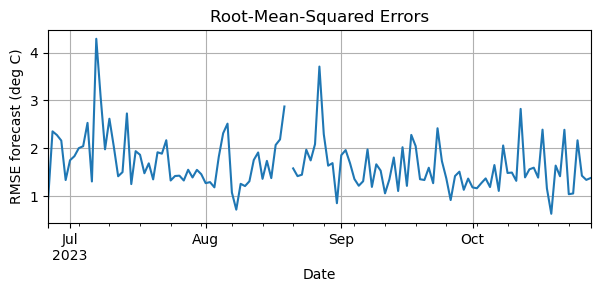

In [15]:
rms_errors.plot(figsize=(7, 2.5), grid=True)
plt.ylabel(f'{rms_errors.name} (deg C)')
plt.title('Root-Mean-Squared Errors')
plt.show()

## Plot 5 worst forecasts

In [16]:
abs_max_errors = forecast_errors.abs().max(axis=1).rename('Max abs. forecast error')
top_5_abs_max_errors = abs_max_errors.sort_values(ascending=False).head()
top_5_abs_max_errors

Date
2023-07-07    7.2
2023-10-12    6.6
2023-07-14    6.1
2023-07-04    5.7
2023-08-05    5.7
Name: Max abs. forecast error, dtype: float64

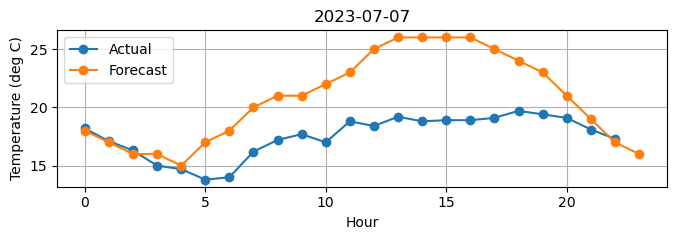

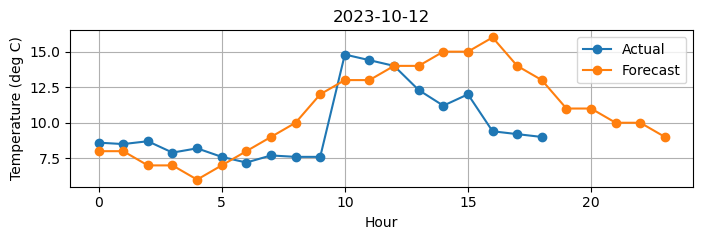

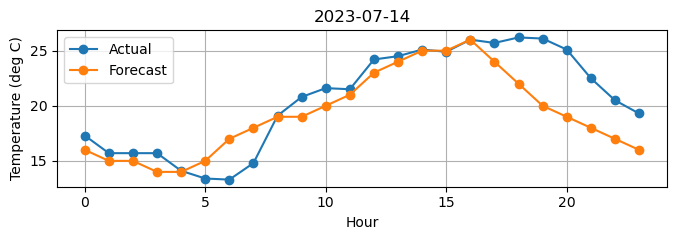

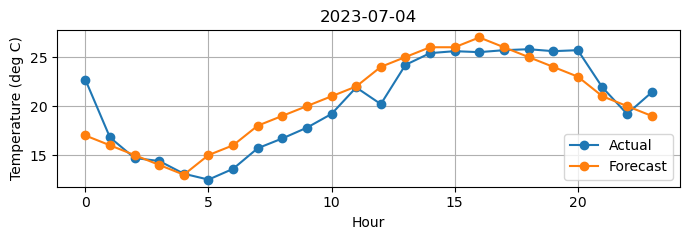

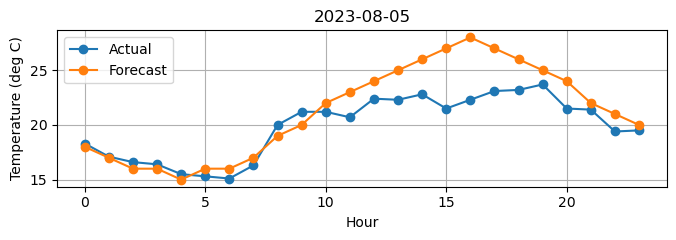

In [17]:
for date in top_5_abs_max_errors.index:
    
    actual_temp = actual_temps.loc[date].rename('Actual')
    fcast_temp = fcast_temps.loc[date].rename('Forecast')
    
    actual_temp.plot(grid=True, style='o-', figsize=(7, 2.5))
    fcast_temp.plot(grid=True, style='o-', figsize=(7, 2.5))
    plt.ylabel('Temperature (deg C)')
    plt.title(date.date())
    plt.legend()
    plt.tight_layout()
    date_str = date.date().strftime('%Y_%m_%d')
    filename = f"fcast_vs_actual_worst_{date_str}.png"
    plt.savefig(os.path.join(plot_dir, filename), dpi=150)
    plt.show()

In [18]:
top_5_errors_rmse = rms_errors.sort_values(ascending=False).head()
top_5_errors_rmse

Date
2023-07-07    4.289066
2023-08-27    3.706809
2023-07-08    3.065534
2023-08-19    2.870086
2023-10-12    2.819948
Name: RMSE forecast, dtype: float64

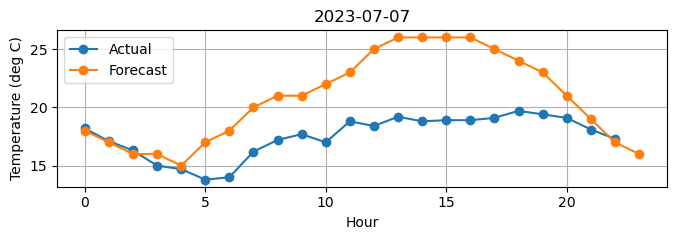

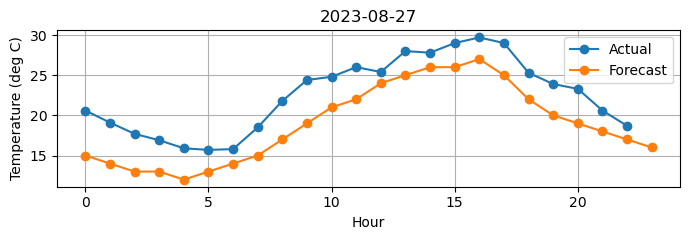

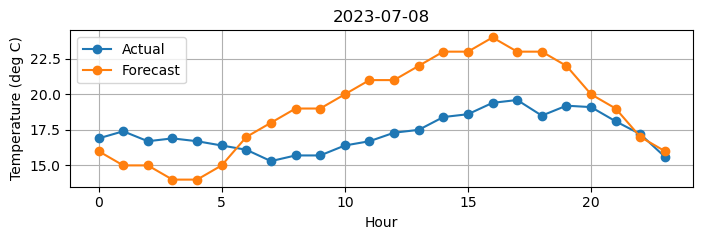

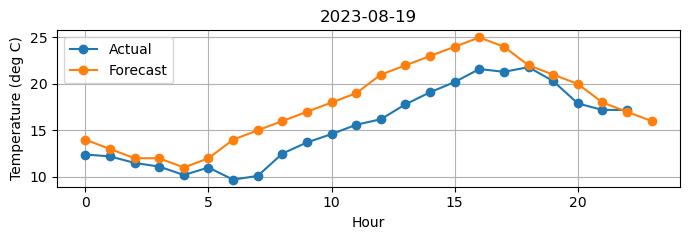

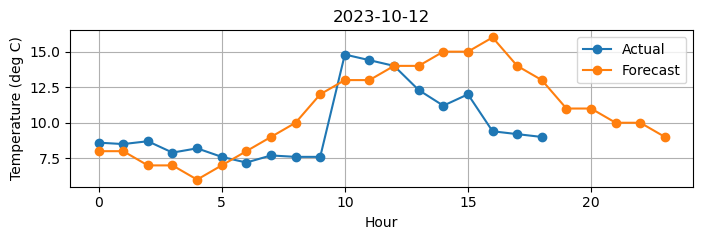

In [19]:
for date in top_5_errors_rmse.index:
    
    actual_temp = actual_temps.loc[date].rename('Actual')
    fcast_temp = fcast_temps.loc[date].rename('Forecast')
    
    actual_temp.plot(grid=True, style='o-', figsize=(7, 2.5))
    fcast_temp.plot(grid=True, style='o-', figsize=(7, 2.5))
    plt.ylabel('Temperature (deg C)')
    plt.title(date.date())
    plt.legend()
    plt.tight_layout()
    date_str = date.date().strftime('%Y_%m_%d')
    filename = f"fcast_vs_actual_worst_{date_str}.png"
    plt.savefig(os.path.join(plot_dir, filename), dpi=150)
    plt.show()

## Performance compared to forecast based on yesterday

In [20]:
baseline_fcast_temps = actual_temps.shift(1)
baseline_fcast_temps.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-27,15.5,15.0,13.3,13.4,12.3,12.4,12.9,15.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-28,17.3,15.6,14.8,14.3,13.3,12.8,12.9,14.0,15.5,17.8,...,19.4,20.4,20.6,20.0,19.8,19.6,20.1,19.4,17.3,16.0
2023-06-29,15.6,15.0,14.0,13.8,13.2,13.4,13.9,15.8,18.9,18.0,...,20.2,20.8,22.1,21.8,22.9,21.5,22.0,20.8,20.8,NaN
2023-06-30,16.7,16.9,16.2,15.9,15.3,15.0,14.8,17.3,17.2,17.8,...,19.2,20.6,22.9,22.6,22.7,22.6,22.0,20.4,17.8,17.0


In [21]:
baseline_forecast_errors = actual_temps - baseline_fcast_temps
baseline_rms_errors = (baseline_forecast_errors ** 2).mean(axis=1).pow(0.5).rename('RMSE baseline')
baseline_rms_errors.head()

Date
2023-06-26         NaN
2023-06-27    1.090298
2023-06-28    1.682002
2023-06-29    1.542161
2023-06-30    1.710263
Freq: D, Name: RMSE baseline, dtype: float64

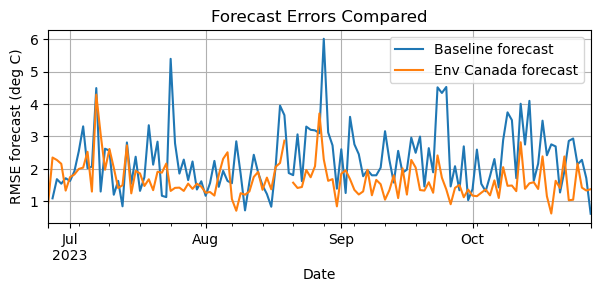

In [22]:
baseline_rms_errors.plot(figsize=(7, 2.5), grid=True, label='Baseline forecast')
rms_errors.plot(figsize=(7, 2.5), grid=True, label='Env Canada forecast')
plt.ylabel(f'{rms_errors.name} (deg C)')
plt.title('Forecast Errors Compared')
plt.legend()
plt.show()

In [23]:
{errors.name: errors.mean() for errors in [baseline_rms_errors, rms_errors]}

{'RMSE baseline': 2.274501283346156, 'RMSE forecast': 1.6630079523158257}

In [24]:
series_to_include = {
    'Actual': actual_temps,
    'Env. Canada 24-hr forecast': fcast_temps,
    'Baseline 24-hr forecast': baseline_fcast_temps
}
combined_data = pd.concat([x.stack() for _, x in series_to_include.items()], axis=1, keys=series_to_include.keys())
combined_data

Actual  Env. Canada 24-hr forecast  Baseline 24-hr forecast
Date       Hour                                                             
2023-06-26 0       15.5                        15.0                      NaN
           1       15.0                        14.0                      NaN
           2       13.3                        13.0                      NaN
           3       13.4                        12.0                      NaN
           4       12.3                        11.0                      NaN
...                 ...                         ...                      ...
2023-10-28 19       NaN                         4.0                      2.9
           20       NaN                         3.0                      2.5
           21       NaN                         3.0                      1.7
           22       NaN                         2.0                      1.4
           23       NaN                         2.0                      1.6

[2999 rows x 3 columns]

## Baseline forecast models

\begin{equation*}
\hat{y}^1_{t+1} = y_{t}
 \tag{1}
\end{equation*}

\begin{equation*}
\hat{y}^2_{t+2} = y_{t}
 \tag{2}
\end{equation*}

\begin{equation*}
\hat{y}^k_{t+k} = y_{t}
 \tag{3}
\end{equation*}

\begin{equation*}
\hat{y}^{24}_{t+k} = y_{t+k-24}
 \tag{4}
\end{equation*}

In [25]:
combined_data['Baseline 1-hr forecast'] = combined_data['Actual'].shift(1)
combined_data['Baseline 2-hr forecast'] = combined_data['Actual'].shift(2)
combined_data['Baseline 3-hr forecast'] = combined_data['Actual'].shift(3)
combined_data

Actual  Env. Canada 24-hr forecast  Baseline 24-hr forecast  \
Date       Hour                                                                
2023-06-26 0       15.5                        15.0                      NaN   
           1       15.0                        14.0                      NaN   
           2       13.3                        13.0                      NaN   
           3       13.4                        12.0                      NaN   
           4       12.3                        11.0                      NaN   
...                 ...                         ...                      ...   
2023-10-28 19       NaN                         4.0                      2.9   
           20       NaN                         3.0                      2.5   
           21       NaN                         3.0                      1.7   
           22       NaN                         2.0                      1.4   
           23       NaN                         2.0                      1.6   

                 Baseline 1-hr forecast  Baseline 2-hr forecast  \
Date       Hour                                                   
2023-06-26 0                        NaN                     NaN   
           1                       15.5                     NaN   
           2                       15.0                    15.5   
           3                       13.3                    15.0   
           4                       13.4                    13.3   
...                                 ...                     ...   
2023-10-28 19                       NaN                     NaN   
           20                       NaN                     NaN   
           21                       NaN                     NaN   
           22                       NaN                     NaN   
           23                       NaN                     NaN   

                 Baseline 3-hr forecast  
Date       Hour                          
2023-06-26 0                        NaN  
           1                        NaN  
           2                        NaN  
           3                       15.5  
           4                       15.0  
...                                 ...  
2023-10-28 19                       NaN  
           20                       NaN  
           21                       NaN  
           22                       NaN  
           23                       NaN  

[2999 rows x 6 columns]

In [26]:
combined_forecast_errors = pd.concat(
    [(combined_data['Actual'] - combined_data[name]).rename(combined_data[name].name) for name in combined_data], 
    axis=1
)
combined_forecast_errors

Actual  Env. Canada 24-hr forecast  Baseline 24-hr forecast  \
Date       Hour                                                                
2023-06-26 0        0.0                         0.5                      NaN   
           1        0.0                         1.0                      NaN   
           2        0.0                         0.3                      NaN   
           3        0.0                         1.4                      NaN   
           4        0.0                         1.3                      NaN   
...                 ...                         ...                      ...   
2023-10-28 19       NaN                         NaN                      NaN   
           20       NaN                         NaN                      NaN   
           21       NaN                         NaN                      NaN   
           22       NaN                         NaN                      NaN   
           23       NaN                         NaN                      NaN   

                 Baseline 1-hr forecast  Baseline 2-hr forecast  \
Date       Hour                                                   
2023-06-26 0                        NaN                     NaN   
           1                       -0.5                     NaN   
           2                       -1.7                    -2.2   
           3                        0.1                    -1.6   
           4                       -1.1                    -1.0   
...                                 ...                     ...   
2023-10-28 19                       NaN                     NaN   
           20                       NaN                     NaN   
           21                       NaN                     NaN   
           22                       NaN                     NaN   
           23                       NaN                     NaN   

                 Baseline 3-hr forecast  
Date       Hour                          
2023-06-26 0                        NaN  
           1                        NaN  
           2                        NaN  
           3                       -2.1  
           4                       -2.7  
...                                 ...  
2023-10-28 19                       NaN  
           20                       NaN  
           21                       NaN  
           22                       NaN  
           23                       NaN  

[2999 rows x 6 columns]

In [27]:
(combined_forecast_errors ** 2).mean().pow(0.5)

Actual                        0.000000
Env. Canada 24-hr forecast    1.753758
Baseline 24-hr forecast       2.475871
Baseline 1-hr forecast        1.211860
Baseline 2-hr forecast        1.959650
Baseline 3-hr forecast        2.622570
dtype: float64

## Adjusted forecast models

\begin{equation*}
\hat{y}^\text{AF}_{t+k} = \hat{y}^\text{F}_{t+k} - \hat{y}^\text{F}_{t} + y_{t}
 \tag{5}
\end{equation*}

## Calculate mean forecast errors by hour of day

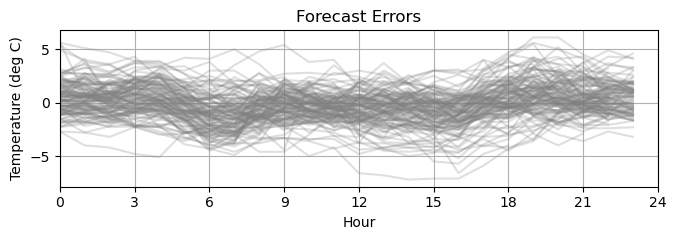

In [28]:
forecast_errors = (actual_temps - fcast_temps)
forecast_errors.T.plot(figsize=(7, 2.5), legend=False, grid=True, color='grey', alpha=0.25)
plt.xticks(np.arange(0, 25, 3))
plt.xlim([0, 24])
plt.ylabel('Temperature (deg C)')
plt.title('Forecast Errors')
plt.tight_layout()
date_str = date.date().strftime('%Y_%m_%d')
filename = f"fcast_errors_all.png"
plt.savefig(os.path.join(plot_dir, filename), dpi=150)
plt.show()

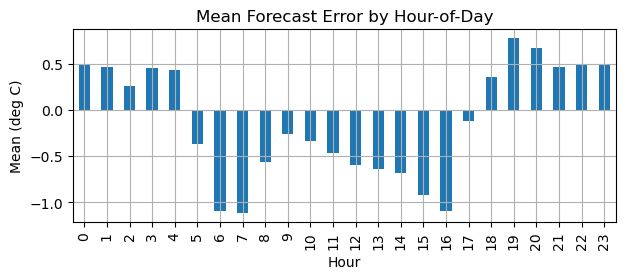

In [29]:
mean_error_by_hour = forecast_errors.mean(axis=0).rename('Mean')
mean_error_by_hour.plot.bar(figsize=(7, 2.5), grid=True)
plt.ylabel(f'{mean_error_by_hour.name} (deg C)')
plt.title('Mean Forecast Error by Hour-of-Day')
plt.show()

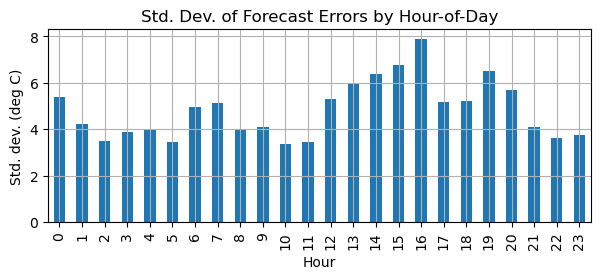

In [30]:
std_error_by_hour = (forecast_errors ** 2).std(axis=0).rename('Std. dev.')
std_error_by_hour.plot.bar(figsize=(7, 2.5), grid=True)
plt.ylabel(f'{std_error_by_hour.name} (deg C)')
plt.title('Std. Dev. of Forecast Errors by Hour-of-Day')
plt.show()

## Distribution of forecast errors

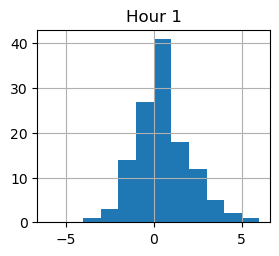

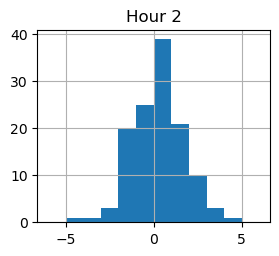

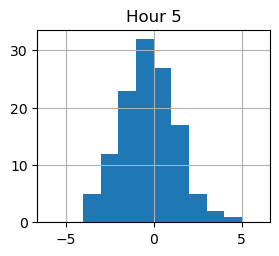

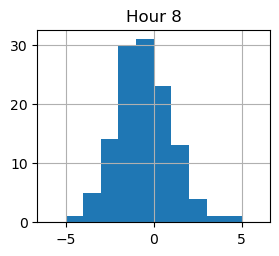

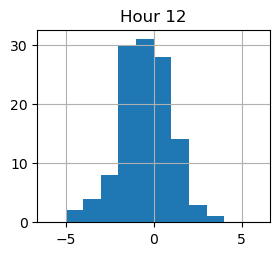

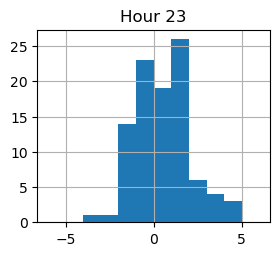

In [31]:
for hour in [1, 2, 5, 8, 12, 23]:
    y = forecast_errors[hour].rename(f'Forecast error at hour {hour}')
    bins = np.linspace(-6, 6, 13)
    y.hist(bins=bins, figsize=(3, 2.5), grid=True)
    plt.title(f'Hour {hour}')
    plt.show()

## Correlation between forecast errors at hour 0 and later hours

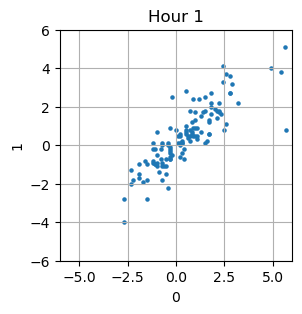

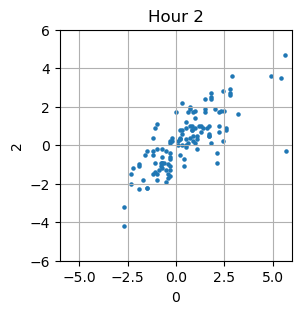

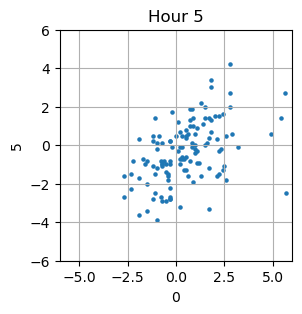

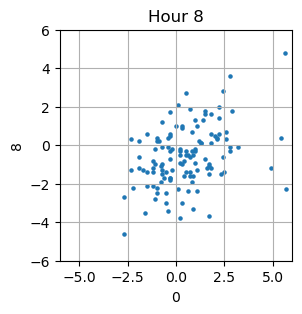

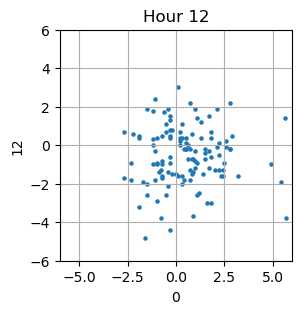

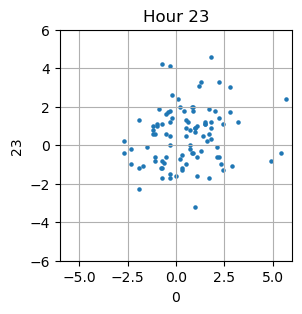

In [32]:
for hour in [1, 2, 5, 8, 12, 23]:
    forecast_errors.plot.scatter(x=0, y=hour, figsize=(3, 3), marker='.', grid=True)
    plt.xlim([-6, 6])
    plt.ylim([-6, 6])
    plt.title(f'Hour {hour}')
    plt.show()

## Correlation between forecast errors and temperature

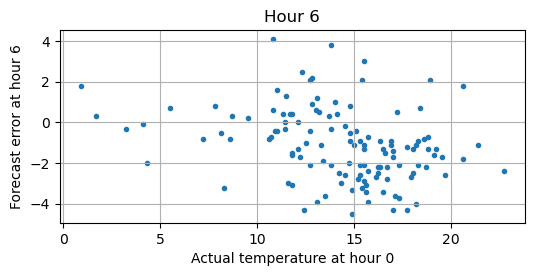

In [33]:
hours = (0, 6)
fcast_temps
x = actual_temps[hours[0]].rename(f'Actual temperature at hour {hours[0]}')
y = forecast_errors[hours[1]].rename(f'Forecast error at hour {hours[1]}')
fig, ax = plt.subplots(figsize=(6, 2.5))
ax.scatter(x=x, y=y, marker='.')
ax.set_xlabel(x.name)
ax.set_ylabel(y.name)
#ax.set_xlim([-6, 6])
#ax.set_ylim([-6, 6])
ax.grid()
ax.set_title(f'Hour {hours[1]}')
plt.show()